In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

Seection of Features
Choosing a performance metric
Choosing a classifier and optimization algorithm
Evaulating the performance of the model
Tuning the algorithm

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
# many ML models require scaling as well
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# use the same fit on test so values are comparable to one another

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1,random_state=0)
# most algorithms in sklearn already support multiclass classification by default via the One-vs-Rest method
ppn.fit(X_train_std,y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print 'number of misclassifications:', (y_test != y_pred).sum()
print 'Accuracy of model is: %.2f' % float(accuracy_score(y_pred,y_test)*100)

number of misclassifications: 4
Accuracy of model is: 91.11


In [6]:
from  matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # set up marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha=0.8,c=cmap(idx),
                   marker=markers[idx],label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')
        

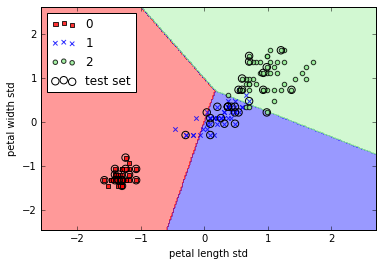

In [7]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length std')
plt.ylabel('petal width std')
plt.legend(loc='upper left')
plt.show()

In [8]:
# three flower classes cannot be perfectly separated by linear decision boundaries because perceptron doesn't
# converge on datasets that arent perfectly linearly separable

## Logistic Regression

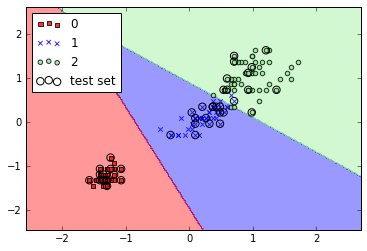

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx = range(105,150))
plt.legend(loc='upper left')
# increasing c decreases regularlization of the model, decreasing c increases regularlization, reducing weight
# importance and preventing overfitting

In [12]:
print lr.predict_proba(X_test_std[0,:])

[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


In [13]:
y_pred = 

SyntaxError: invalid syntax (<ipython-input-13-9d35aa51d2ac>, line 1)

In [15]:
y_pred != y_test

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False], dtype=bool)

In [16]:
accuracy_score(lr.predict(X_test_std),y_test)

0.97777777777777775

In [17]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0)

In [18]:
accuracy_score(lr.predict(X_train_std),y_train)

0.96190476190476193

In [19]:
lr.coef_ # coefficients by each class

array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

In [20]:
from sklearn.metrics import classification_report
print classification_report(lr.predict(X_train_std),y_train)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.94      0.94      0.94        32
          2       0.95      0.95      0.95        39

avg / total       0.96      0.96      0.96       105



In [21]:
import statsmodels.api as sm

## Tackling Overfitting Via Regularlization

Overfitting is a common problem, where model performs well on training but does not generalize well to test data
Model has high variance, too many parameters that lead to a model that is too complex
Underfitting can also happen, high bias, which means model is not complex enough to capture the pattern in training data

We can tune complexity of the model via regularlization. Handles colinearity, filters out noise from data, and prevents overfitting

We introduce additional information (bias) to penalize extreme parameter weights

Most common is L2 regularlization or L2 norm

Which is just 

+alpha/2 ||w||^2 

We need to ensure all features are on comparable scales

We simply add the regularlization term to the cost function defined for logistic regression (notes) to shrink the 
weights

We can tune the regularlization parameter by tuning alpha, controlling how well we fit the training data, by increasing alpha, we increase regularlization strength

## How Is The Regularlization Parameter Represented in sklearn?

via the parameter C

Comes from a convention in support vector machines

C is directly related to the regularlization parameter above, however it's the INVERSE in sklearn

C = 1 / alpha

This means that decreasing the value of the inverse regularlization parameter C means that we are increasing regularlization strength in logistic regression



## Support Vector Machines

Extension of perceptron

Goal: Maximize margin, distance btween the separating hyperplane (decision boundary) and the training samples that are closest to the hyperplane, which are called the support vectors

Max margins = lower generalization error, small margins = more overfitting

Maximize 2 / ||w|| which is the margin, we want to minimize ||w|| - which is simply the length or magnitude of w

wT(xpos - xneg) / ||w||

We have to maximize under constraint samples are classified correctly:
    w0 + wTx^i >=1 if y^i = 1
    w0 + wTx^i < -1 if y^i = -1
    
    or more compactly
    
    y^i(w0+wTx^i) >= 1
    
In practice, easier to minimize reciprocal term 1/2||w||^2

## Dealing With Non-Linearly Separable Cases Using Slack Variables

A slack variable, s, leads to a soft margin classification, by taking the error from the correct support vector to the observation that is misclassified. If an observation is correctly classified, the slack takes a zero value, if not, the slack is the size of the error between the correct support vector and the vector for the observation misclassified.

Positive slack value variables only

Added to the linear constrains:

    wTx^i >= 1 - c^i if y^i = 1
    wTx^i <= -1 + c^i if y^i = -1
And the new objective to be minimized subject to preceding constrains becoems:
    1/2||w||^2 + C(sum of all slack variables i)
Using c, we can control the pantly for misclassification, large values = large error penalties, less strict if value of c is smaller

Large value of c = small margin, large penalty
Small value of c = large margin, smaller penalty, more generalizeable



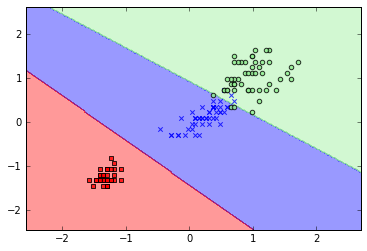

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std.values, y_train.values.reshape(len(y_train)))
plot_decision_regions(X_combined_std, y_combined, classifier=svm)

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of training, which makes it more prone to outliers than SVM. The SVMs care mostly about the points that are closest to the decision boundary (support vectors). Logistic regression is a simpler model that can be implemented more easily. Logistic regression models also can be updated more easily. 

For datasets too large to fit into memory, we can use the SGDclassifier class, which supports online learning via the partial_fit method

Similar to stochastic gradient descent algorithm

In [34]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron') # perceptron
lr = SGDClassifier(loss='log') # logistic regression
svm = SGDClassifier(loss='hinge') # support vector

## Solving Non-Linear Problems Using a Kernel SVM

SVM can be easily kernelized to solve nonlinear classification problems

Using linear hyperplanes dont work for nonlinear problems

Kernel methods deal with linearly inseperable data and create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function alpha(.)

e.g. alpha(x1,x2) = (z1,z2,z3) = (x1,x2,x1^2+x2^2)

This allows us to separate the two classes via a linear hyperplane that becomes nonlinear if we project it back onto the original feature space

## The Kernel Trick

Transform the training data onto a higher dimensional feature space via a mapping function alpha(.)

We can use the same mapping function to transform new, unseen data to classify it using the linear SVM model

Construction of new features is computationally very expensive

This is where the kernel trick comes into play

All we need to do is replace the dot product in the optimiztion equation with the transformed dot product

In order to save the step of calculating dot product between two points explicitly, we define a kernel function

k(x^i, x^j) = alphax^iTalphax^j

Radial Basis Function Kernel:
    k(x^i, x^j) = exp(-||x^i-x^j||^2/2sigma^2)
or
    k(x^i, x^j) = exp(-lambda * ||x^i-x^j||^2)

where lambda is 1/2sigma^2 - a free parameter to be optimized

The kernel can be interpreted as a similarity function between a pair of samples, the minus sign inverts the distance measure into a similarity score and due to exponential ter, the resulting score is between 1 (similar) and 0

In [51]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train.values.reshape(len(y_train)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.2,
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

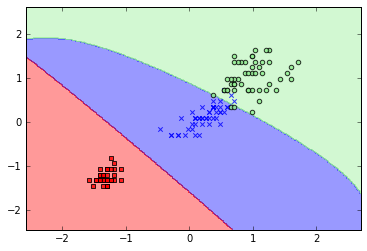

In [52]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm)
# gamma parameter can be understood as a cut-off parameter for the gaussian sphere
# if we increase the value for gamma, we increase the influence or reach of the training samples, which leads to a
# softer decision boundary